In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

Un primer paso en cualquier esfuerzo por analizar o modelar datos debe ser comprender cómo se distribuyen las variables. Las técnicas para la visualización de la distribución pueden proporcionar respuestas rápidas a muchas preguntas importantes. 

     * ¿Qué rango cubren las observaciones? 
     * ¿Cuál es su tendencia central? 
     * ¿Están muy sesgados en una dirección? 
     * ¿Hay evidencia de bimodalidad? 
     * ¿Hay valores atípicos significativos? 
     * ¿Varían las respuestas a estas preguntas entre los subconjuntos definidos por otras variables?


El módulo de distribuciones contiene varias funciones diseñadas para responder preguntas como estas. Las funciones a nivel de ejes son **histplot(), kdeplot(), ecdfplot(), and rugplot()**. Se agrupan dentro del nivel de figura **displot(), jointplot(), and pairplot()**.

## 1. Graficando histogramas unimodales

**La funcion por defecto de displot() es un histograma.**

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


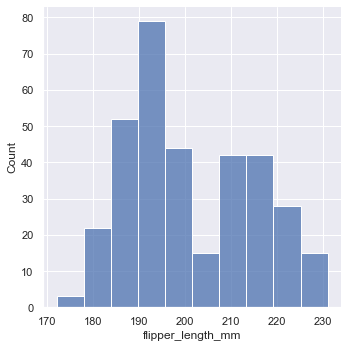

In [4]:
sns.displot(data=penguins, x='flipper_length_mm')

### 1.1 Ajustando el tamano o el numero de los bins

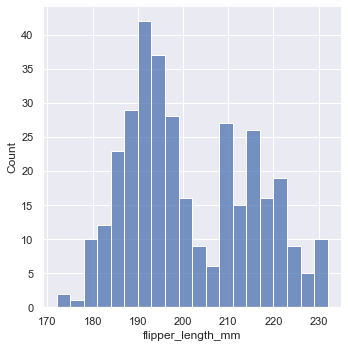

In [6]:
# Podemos ajustar el tamano de los bins con bindwidth
sns.displot(data=penguins, x='flipper_length_mm', binwidth=3)

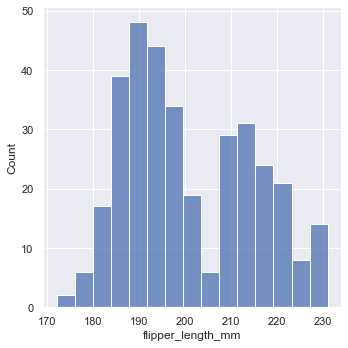

In [8]:
# O sencillamente, determinar el numero de bins
sns.displot(data=penguins, x='flipper_length_mm', bins=15)

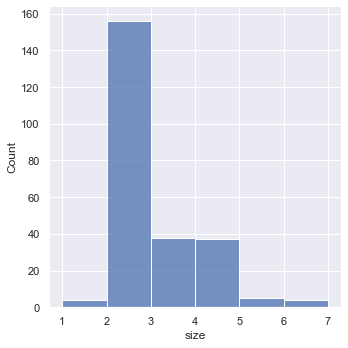

In [10]:
# Si tenemos muy pocos valores (menos de 10). Podemos pasar un array de bins
tips = sns.load_dataset("tips")
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

Esto también se puede lograr configurando **discrete=True, que elige divisiones que representan los valores únicos en un conjunto de datos con barras** centradas en su valor correspondiente.

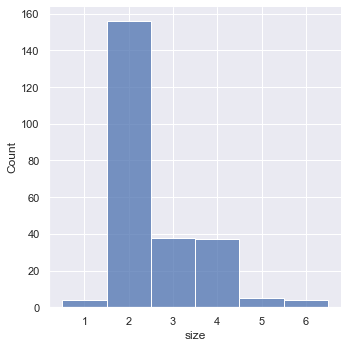

In [13]:
sns.displot(tips, x='size', discrete=True);

### 1.2 Histograma para variables categoricas

También es posible visualizar la distribución de una variable categórica usando la lógica de un histograma. Los contenedores discretos se configuran automáticamente para las variables categóricas, **pero también puede ser útil "reducir" shrink las barras ligeramente para enfatizar la naturaleza categórica del eje**.

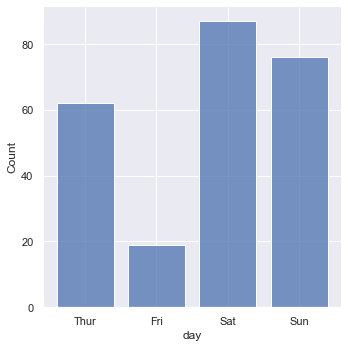

In [17]:
sns.displot(tips, x='day', shrink=0.8)

## 2. Combinar histogramas con variables categoricas

Una vez que comprenda la distribución de una variable, el siguiente paso suele ser preguntar si las características de esa distribución difieren entre otras variables en el conjunto de datos.

### 2.1 Utilizar "hue" para agregar variables categoricas

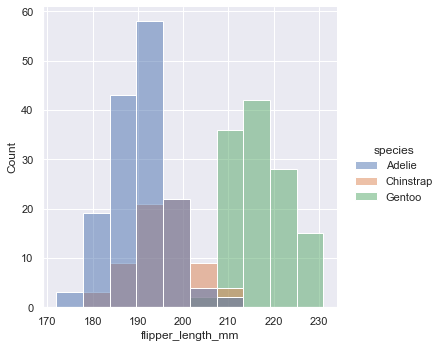

In [20]:
sns.displot(penguins, x='flipper_length_mm', hue='species');

### 2.2 Desolapar los histogramas con element='step'

Los histogramas aparecen uno encima del otro, si queremos evitar este solape, debemos utilizar el argumento element="step"

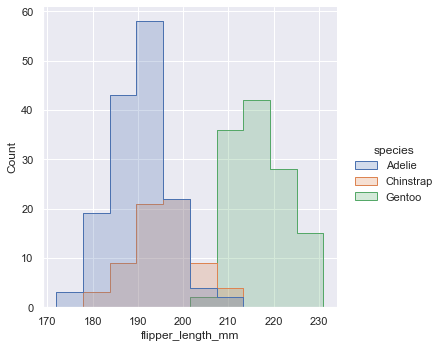

In [21]:
sns.displot(penguins, x='flipper_length_mm', hue='species', element='step')

### 2.3 Solapar las barras del histograma con multiple="stack"

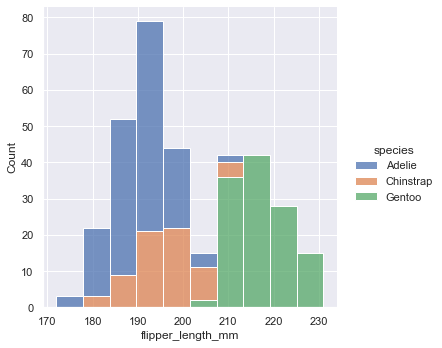

In [26]:
sns.displot(penguins, x='flipper_length_mm', hue='species', multiple='stack', bins=10)

### 2.4 Colocar una barra al lado de la otra con multiple="dodge"

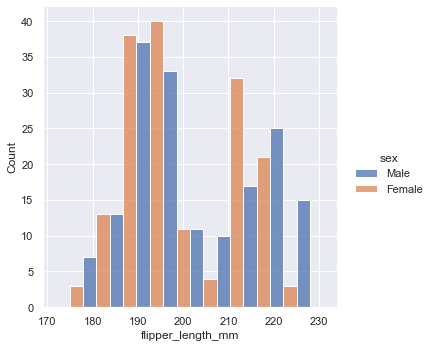

In [29]:
# Esta caracteristica es util, principalmente para dos categorias
sns.displot(penguins, x='flipper_length_mm', hue='sex', multiple='dodge')

### 2.5 Hacer dos histogramas utilizando "col" y una variable cualitativa

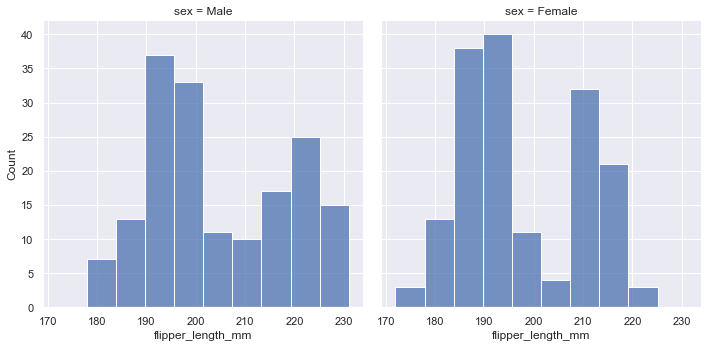

In [31]:
sns.displot(penguins, x='flipper_length_mm', col='sex');

## 3. Normalizar los datos en los histogramas

Antes de hacerlo, otro punto a tener en cuenta es que, cuando los subconjuntos tienen un número desigual de observaciones, comparar sus distribuciones en términos de conteos puede no ser lo ideal. Una solución es normalizar los conteos usando el parámetro stat

### 3.1 Utilizar stat="density" para normalizar los datos 

La normalización de densidad escala las barras para que sus áreas sumen 1. Como resultado, el eje de densidad no se puede interpretar directamente.

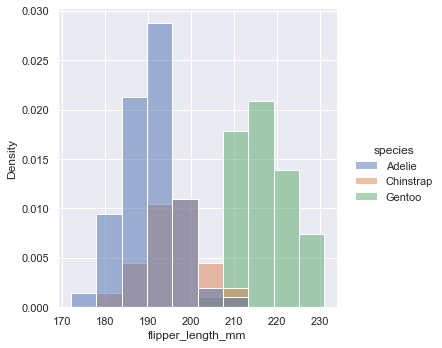

In [33]:
# En este caso los conteos apareceran reflejados de forma porcentual
sns.displot(penguins, x='flipper_length_mm', hue='species', stat='density')

De forma predeterminada, la normalización se aplica a toda la distribución, por lo que esto simplemente vuelve a escalar la altura de las barras. **Al establecer common_norm=False, cada subconjunto se normalizará de forma independiente**

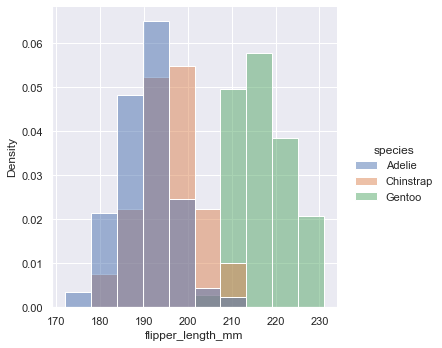

In [34]:
sns.displot(penguins, x='flipper_length_mm', hue='species', stat='density', common_norm=False)

### 3.2 Normalizacion porcentual con la altura de las barras con stat="probability"

Otra opción es normalizar las barras para que sus alturas sumen 1. Esto tiene más sentido cuando la variable es discreta, pero es una opción para todos los histogramas

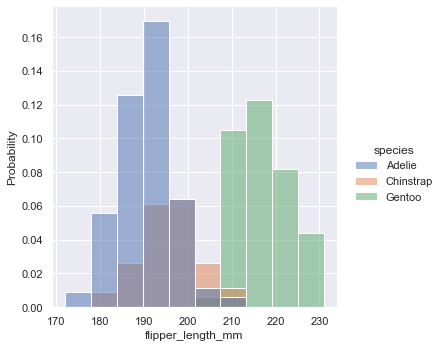

In [35]:
sns.displot(penguins, x='flipper_length_mm', hue='species', stat='probability')

## 4. Kernel density estimation

Un histograma tiene como objetivo aproximar la función de densidad de probabilidad subyacente que generó los datos al agrupar y contar las observaciones. La estimación de la densidad del kernel (KDE) presenta una solución diferente al mismo problema. **En lugar de usar contenedores discretos, un gráfico de KDE suaviza las observaciones con un núcleo gaussiano, produciendo una estimación de densidad continua**

### 4.1 Aplicar kernel density estimation -  kind="kde"

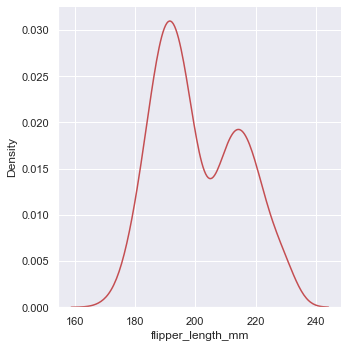

In [37]:
sns.displot(penguins, x='flipper_length_mm', kind='kde', color='r')

### 4.2 Suavizar la linea con "bw_adjust=" para visualizar mejor la linea

Al igual que con el tamaño del contenedor en el histograma, **la capacidad de KDE para representar con precisión los datos depende de la elección del ancho de banda suavizado**. **Una estimación suavizada en exceso puede borrar características significativas**, pero una estimación suavizada por debajo puede oscurecer la forma real dentro del ruido aleatorio.

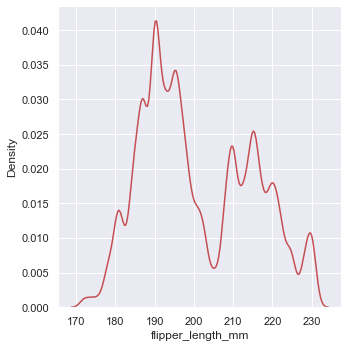

In [38]:
sns.displot(penguins, x='flipper_length_mm', kind='kde', color='r', bw_adjust=.25)

### 4.3 KDE con variable categoricas - "hue="

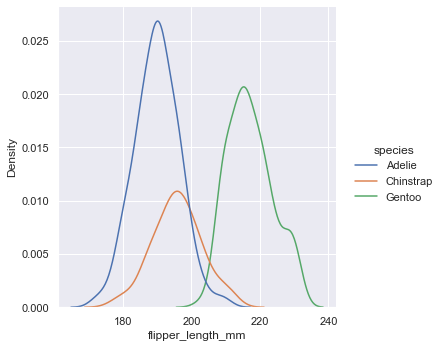

In [39]:
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species')

### 4.4 Rellenar las curvas del KDE con  multiple="stack"

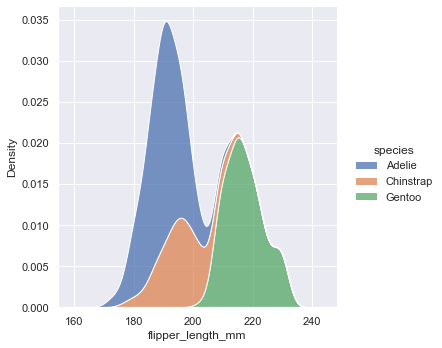

In [40]:
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species', multiple='stack')

### 4.5 Disminuir la opacidad de los rellenos con "fill=True"

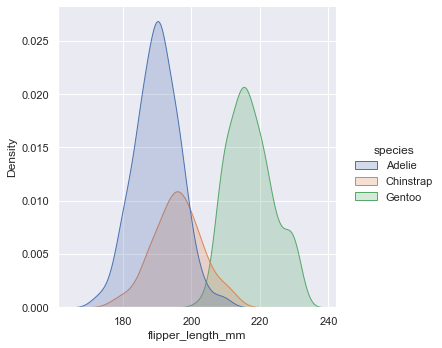

In [42]:
sns.displot(penguins, x='flipper_length_mm', 
            kind='kde', hue='species', fill=True)

### 4.6  Combinar el histograma con el KDE - kde=True

Recordemos que el grafico por defecto de displot es un histograma, si queremos combinarlo con un KDE, solo debemos colocar dentro del grafico, el parametro kde=True

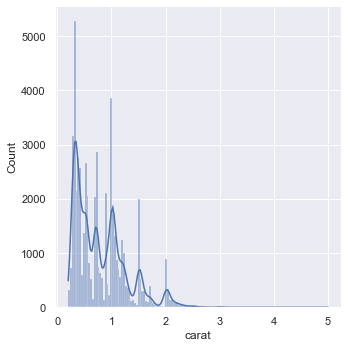

In [45]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x='carat', kde=True)

## 5. Distribuciones acumulativas empíricas - ECDF

Una tercera opción para visualizar distribuciones calcula la **"función de distribución acumulativa empírica" ​​(ECDF)**. Esta gráfica dibuja una curva de crecimiento monótono a través de cada punto de datos, de modo que la altura de la curva refleja la proporción de observaciones con un valor más pequeño.

### 5.1 Aplicar una ECDF con "kind="ecdf"

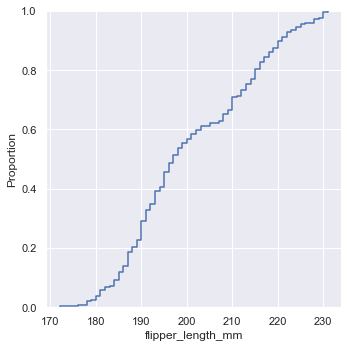

In [46]:
sns.displot(penguins, x='flipper_length_mm', kind="ecdf")

### 5.2 ECDF con variables categoricas

La trama ECDF tiene dos ventajas clave. A diferencia del histograma o KDE, representa directamente cada punto de datos. Eso significa que no hay que considerar un tamaño de contenedor o un parámetro de suavizado. Además, debido a que la curva aumenta monótonamente, es adecuada para comparar distribuciones múltiples

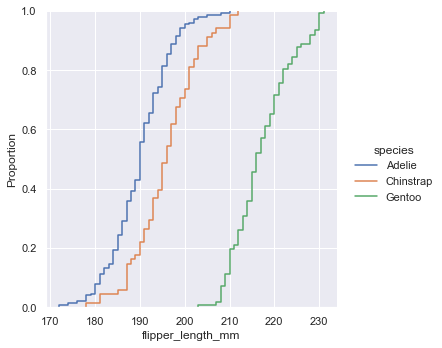

In [49]:
sns.displot(penguins, x='flipper_length_mm', kind="ecdf", hue='species')

## 6. Distribuciones bivariadas - dos variables

Para graficar distribuciones bivariadas solo **debemos agregar el parametro y** a nuestro grafico

### 6.1 Histograma bivariado aka heatmap

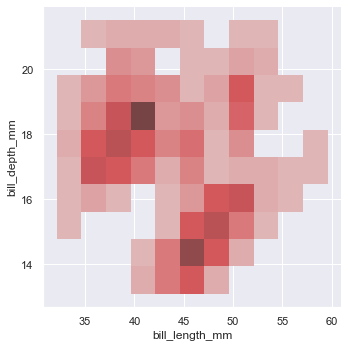

In [52]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", color='r')

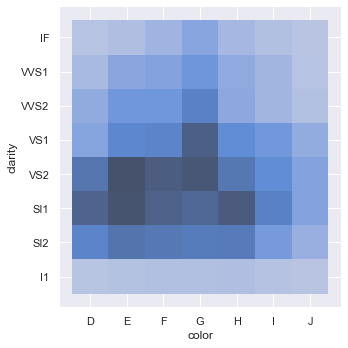

In [61]:
sns.displot(diamonds, x="color", y="clarity")

### 6.2 KDE bivariado

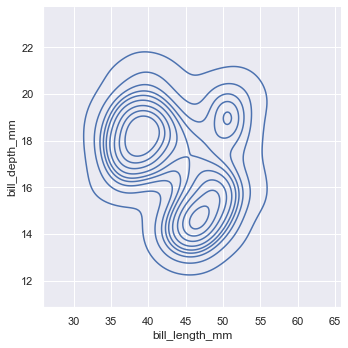

In [53]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

### 6.3 Histograma bivariado con una variable categorica

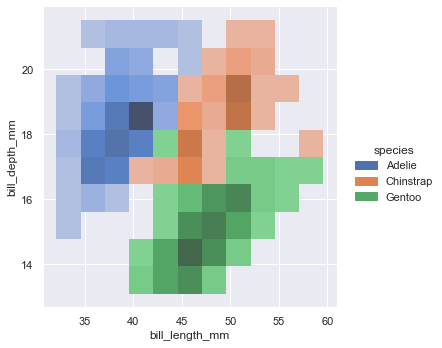

In [55]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue='species')

### 6.4 KDE bivariado con una variable categorica 

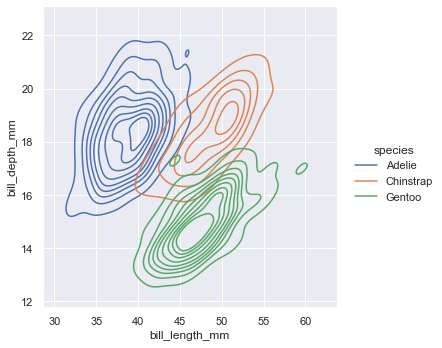

In [58]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

### 6.5 Definir el bindwith y agregar el cbar del histograma - binwidth=(x,y)) - cbar=True

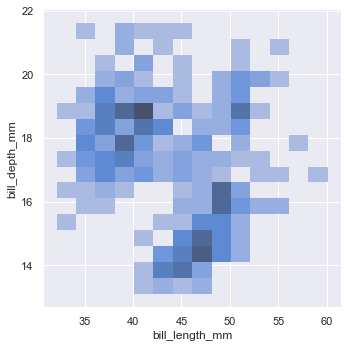

In [59]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2,.5))

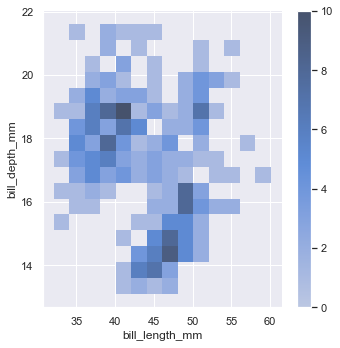

In [60]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2,.5), cbar=True)

## 7. Otras opciones de visualizacion de distribuciones

### 7.1 jointplot() - Graficar la relación y la distribución en los margenes

jointplot(), que aumenta un gráfico relacional o de distribución bivariado con las distribuciones marginales de las dos variables. **Por defecto, jointplot() representa la distribución bivariada usando scatterplot() y las distribuciones marginales usando histplot()**

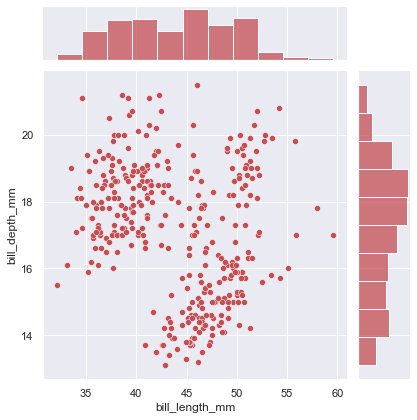

In [63]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", color='r')

### 7.2 jointplot() con KDE

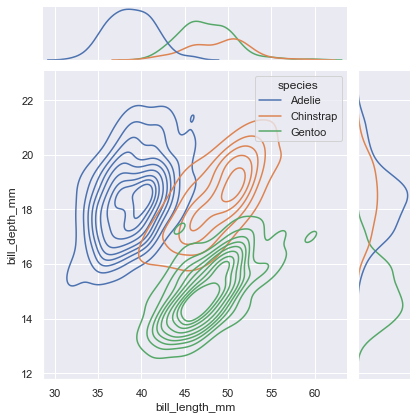

In [68]:
sns.jointplot(data=penguins,  x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

### 7.3 jointplot() con boxplot - JointGrid y plot_marginals

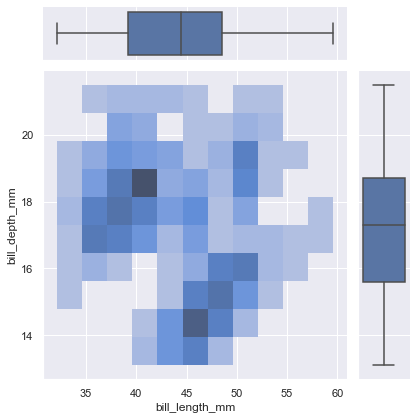

In [70]:
# Debemos crear una variable con el joinplot() para luego agregarle el boxplot
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)


### 7.4 jointplot y rugplot (mide la frecuencia individual de los datos)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

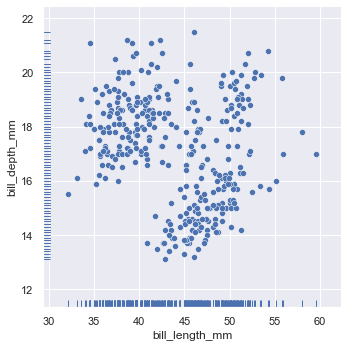

In [74]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

## 8. Graficar varias distribuciones de forma simultanea 

### 8.1 pairplot()

La función pairplot() ofrece una combinación similar de distribuciones conjuntas y marginales. Sin embargo, en lugar de centrarse en una sola relación, **pairplot() utiliza un enfoque de "pequeño múltiplo" para visualizar la distribución univariada de todas las variables** en un conjunto de datos junto con todas sus relaciones por pares.

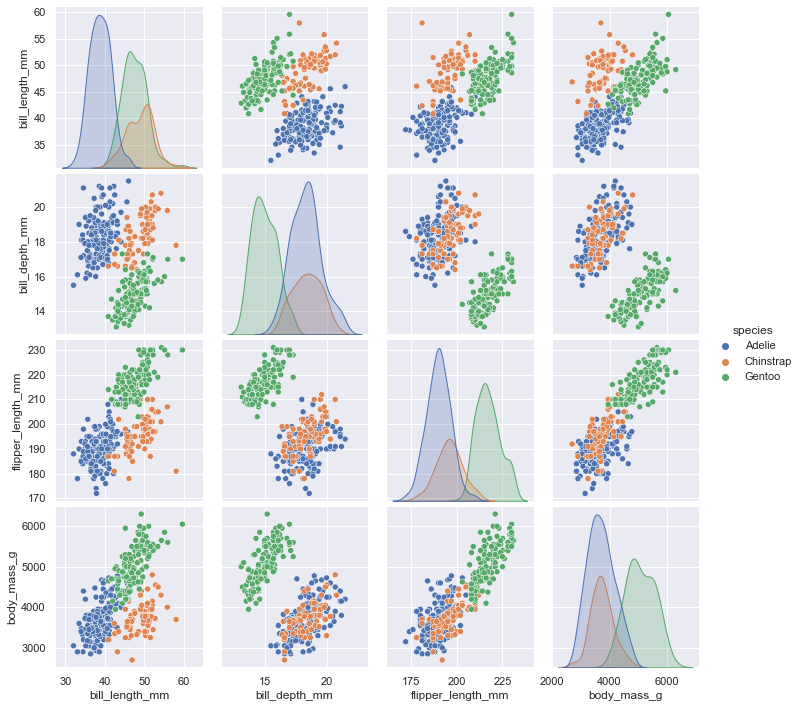

In [78]:
sns.pairplot(penguins, hue='species')

### 8.2 Pairplot con PairGrid

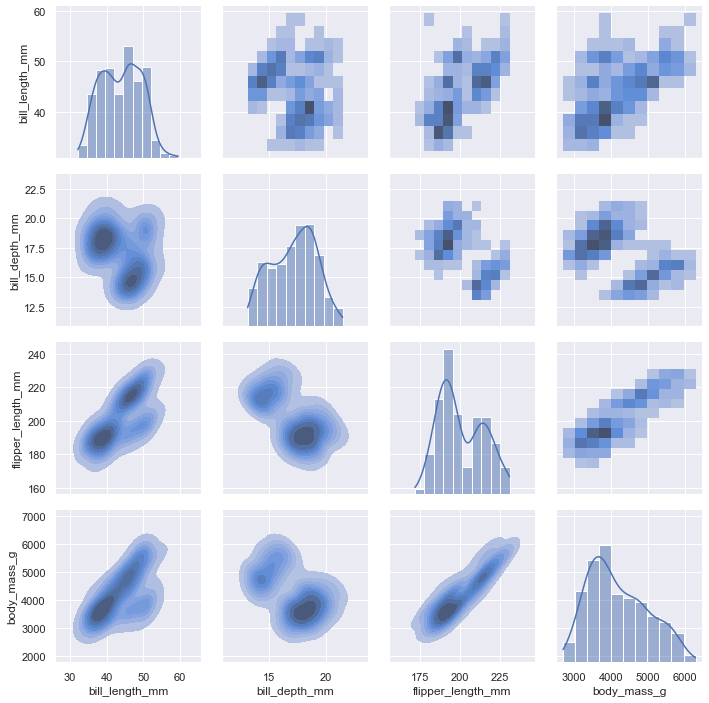

In [79]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)